In [2]:
import json 
with open("q.json","r") as f:
    q = json.load(f)

In [4]:
directions = ["right","left"]
devices = ["on","off"]
import os
from glob import glob
import numpy as np
from scipy import stats

conditions = [('右あり',('right','on')),('右なし',('right','off')),('左あり',('left','on')),('左なし',('left','off'))]
movements = ["upper","bottom"]
terms = ["go","back"]
directions = ["right","left"]
devices = ["on","off"]

for movement in movements:
    for direction in directions:
        for term in terms:
            d1 = q[movement][direction]["on"][term]
            d2 = q[movement][direction]["off"][term]
            p_value = stats.wilcoxon(d1,d2).pvalue
            print(movement,direction,term)
            if p_value >= 0.05:
                print(p_value,"x")
            elif p_value < 0.01:
                print(p_value,"**")
            else:
                print(p_value,"*")
            

upper right go
0.0341796875 *
upper right back
0.01085324680751466 *
upper left go
0.011170709597614679 *
upper left back
0.02099609375 *
bottom right go
0.004016514660032747 **
bottom right back
0.00048828125 **
bottom left go
0.015186198557064549 *
bottom left back
0.00616989932054416 **


In [9]:
import pandas as pd

df = pd.DataFrame({
    "motion":[],
    "device":[],
    "condition":[],
    "value":[]
})
for movement in movements:
    for direction in directions:
        for term in terms:
            for device in devices:
                condition = direction + '-' + term
                for value in q[movement][direction][device][term]:
                    df = df.append({"motion":movement,"condition":condition,"device":device,"value":value},ignore_index=True)
df.to_csv("q.csv")

C:\Users\trave_share\AppData\Local\Temp\ipykernel_21464\3981066813.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"motion":movement,"condition":condition,"device":device,"value":value},ignore_index=True)
C:\Users\trave_share\AppData\Local\Temp\ipykernel_21464\3981066813.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"motion":movement,"condition":condition,"device":device,"value":value},ignore_index=True)
C:\Users\trave_share\AppData\Local\Temp\ipykernel_21464\3981066813.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"motion":movement,"condition":condition,"device":device,"value":value},ignore_index=True)
C:\Users\trave_share\AppData\Local\Temp\ipykernel_21464

In [10]:
df.head()


,motion,device,condition,value
0,upper,on,right-go,2.0
1,upper,on,right-go,6.0
2,upper,on,right-go,5.0
3,upper,on,right-go,3.0
4,upper,on,right-go,5.0


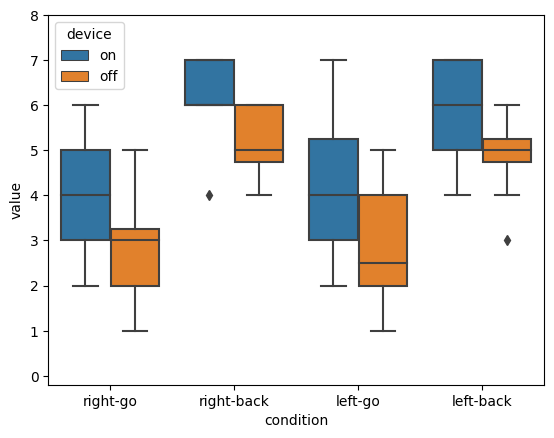

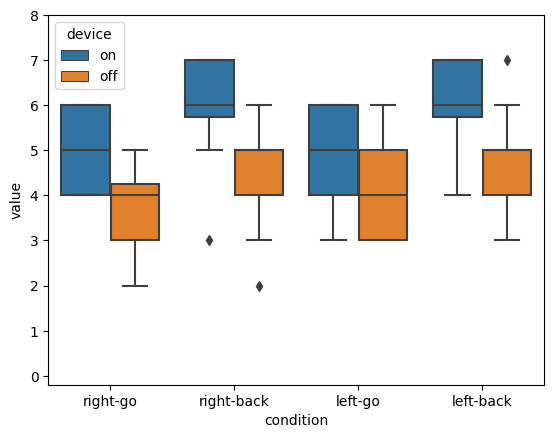

<Figure size 640x480 with 0 Axes>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
for motion in movements:
    sns.boxplot(x="condition",y="value",hue="device",data=df[df["motion"] == motion])
    plt.ylim(-0.2,8)
    plt.show()
    plt.clf()